### Assignment 1: Python (10 points)
Aiman Madan

September 12th,2024

## Descreption and Requirments

For this problem, you are only allowed to use standard python libraries. You may not use third party libraries or call any shell/bash functions.

You are given a list of tuples of the form (<float> x, <float> y, <float> r) (Let’s call these c-tuples). Each c-tuple represents a circle on a rectangular coordinate space, with x and y being the coordinates of the center, and r being the radius. Assume that each c-tuple has a unique radius.

Let a cluster of circles be a group of circles where each circle in the group overlaps with at least one other circle in that group. A path is formed between two circles when they overlap. Define a cluster as a group of n circles, where each circle is reachable from every other circle through the formed paths.

Write a python script that does the following: Return True if the given circles form a cluster and return false if they don’t form a cluster.

Below are some test cases.



**Test case 1:**

In [ ]:
# c-tuples for first test case (<float> x, <float> y, <float> r)
test_case_1 = [
    (1, 3, 0.7),
    (2, 3, 0.4),
    (3, 3, 0.9)
    ]

**Test case 2:**

In [ ]:
# c-tuples for second test case (<float> x, <float> y, <float> r)
test_case_2 = [
    (1.5, 1.5, 1.3),
    (4, 4, 0.7)
    ]

**Test case 3:**

In [ ]:
# c-tuples for third test case (<float> x, <float> y, <float> r)
test_case_3 = [
    (0.5, 0.5, 0.5),
    (1.5, 1.5, 1.1),
    (0.7, 0.7, 0.4),
    (4, 4, 0.7)
    ]

**Test case 4:** (Additional)

In [ ]:
# c-tuples for fourth test case (<float> x, <float> y, <float> r)
test_case_4 = [

    (3, 2, 0.2),
    (2.5, 3, 2),
    (3.5, 3, 0.1),
    (3, 1.5, 0.8),
    (2, 2, 3)
    ]

## Python script that does the following:
Return True if the given circles form a cluster and return false if they don’t form a cluster

Imports

In [ ]:
import math
from collections import deque
import matplotlib.pyplot as plt

This function checks whether two circles overlap.
It calculates the Euclidean distance between the centers of the two circles and compares it to the sum of their radius.

In [ ]:
def circles_overlap(c1, c2):
    x1, y1, r1 = c1
    x2, y2, r2 = c2
    distance = math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) # Euclidean distance.
    return distance == (r1 + r2)

This function builds a graph where each circle is a node, and an edge exists between two nodes if their corresponding circles overlap.


In [ ]:
def build_graph(circles):
    # Create an empty graph
    graph = {i: [] for i in range(len(circles))}

    for i in range(len(circles)):
        for j in range(i + 1, len(circles)):
            # Check if circles overlap
            if circles_overlap(circles[i], circles[j]):
                graph[i].append(j)
                graph[j].append(i)
    return graph

 This function uses a Breadth-First Search (BFS) to determine if all nodes (circles) in the graph are connected. If all circles are reachable from each other, the circles form a single cluster.

In [ ]:
def is_single_cluster(graph, n):
    # Initialize variables
    visited = [False] * n
    cluster_size = 0

    # BFS function
    def bfs(start_node):
        nonlocal cluster_size
        queue = deque([start_node])
        visited[start_node] = True
        while queue:
            node = queue.popleft()
            cluster_size += 1
            for neighbor in graph[node]:
                if not visited[neighbor]:
                    visited[neighbor] = True
                    queue.append(neighbor)

    # Start BFS from the first node
    bfs(0)

    # If the BFS visited all nodes, then all circles are connected
    return cluster_size == n

This is the main function that determines whether the given circles form a cluster.

In [ ]:
def circles_form_cluster(circles):
    n = len(circles)
    if n == 0:
        return False
    if n == 1:
        return True

    # Build the graph
    graph = build_graph(circles)

    return is_single_cluster(graph, n)

Plotting function

In [ ]:
def plot_circles(c_tuples):
  fig, ax = plt.subplots()
  for c_tuple in c_tuples:
    circle = plt.Circle((c_tuple[0], c_tuple[1]), c_tuple[2], fill=False)
    ax.add_patch(circle)
  plt.axis('scaled')
  plt.show()

# Test Results

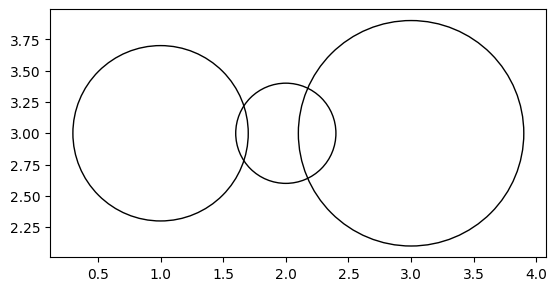

Test case 1 forms a cluster: False


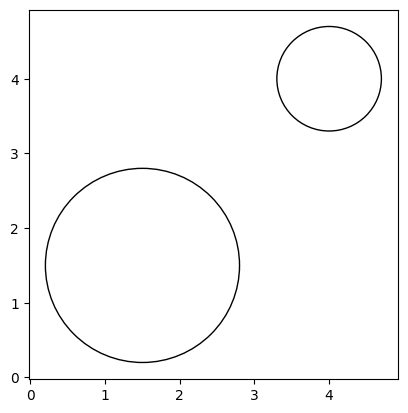

Test case 2 forms a cluster: False


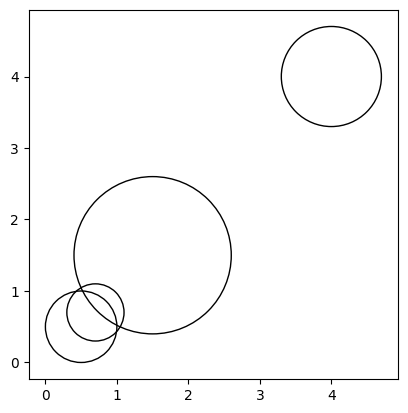

Test case 3 forms a cluster: False


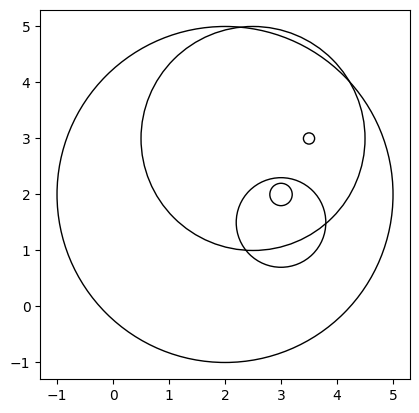

Test case 4 forms a cluster: False


In [ ]:
# Check if test_case_1 forms a cluster
result = circles_form_cluster(test_case_1)
plot_circles(test_case_1)
print(f"Test case 1 forms a cluster: {result}")

# Check if test_case_2 forms a cluster
result_2 = circles_form_cluster(test_case_2)
plot_circles(test_case_2)
print(f"Test case 2 forms a cluster: {result_2}")

# Check if test_case_3 forms a cluster
result_3 = circles_form_cluster(test_case_3)
plot_circles(test_case_3)
print(f"Test case 3 forms a cluster: {result_3}")

# Check if test_case_4 forms a cluster
result_4 = circles_form_cluster(test_case_4)
plot_circles(test_case_4)
print(f"Test case 4 forms a cluster: {result_4}")